# <center> Comp0051 Algorithmic Trading Coursework 1 </center>

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt 
from datetime import datetime
from datetime import timedelta 
from statsmodels.tsa.stattools import acf, pacf

## Time series

1. Download a price time series using an API. The length of the time serise T, with T = 300. The resolution could be any, from tick data to months

In [2]:
# Downlaod UTC-USD data from yahoo finance.
btc_usd = yf.Ticker("BTC-USD")
start_date = datetime(2022,1,1)
end_date = datetime(2022,1,1) + timedelta(days = 300)
btc_data = yf.download("BTC-USD", start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


2.Plot the price time series

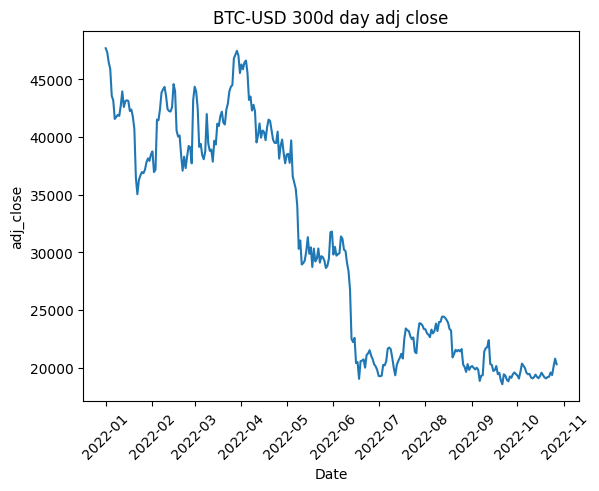

In [3]:
btc_adj_price = btc_data["Adj Close"]
plt.plot(btc_adj_price)
plt.xlabel("Date")
plt.ylabel("adj_close")
plt.title("BTC-USD 300d day adj close")
plt.xticks(rotation=45)
plt.show()

## Moving averages

3. Define mathematically the moving average of the price time series with an arbitrary time window $\tau$

For a price time series $\{X_t\}$ and time window $\tau$ we have:
$$X_t = \frac{1}{\tau} \times \sum_{i=t-\tau}^{t} X_i$$ 
For any $t\in\mathbb{N}$, $\tau\leq t$

4. Compute three moving averages of the price time series, with time-windows $\tau=$ 10,20,30

In [35]:
ma_10 = btc_adj_price.rolling(10).mean()
ma_20 = btc_adj_price.rolling(20).mean()
ma_30 = btc_adj_price.rolling(30).mean()

5. Plot the moving averages against the price time series

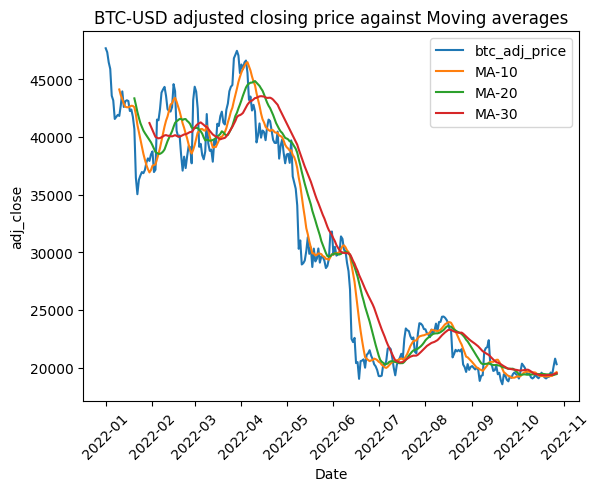

In [5]:
l1, = plt.plot(btc_adj_price,label='btc_adj_price')
l2, = plt.plot(ma_10,label='MA-10')
l3, = plt.plot(ma_20,label='MA-20')
l4, = plt.plot(ma_30,label='MA-30')
plt.xlabel("Date")
plt.ylabel("adj_close")
plt.title("BTC-USD adjusted closing price against Moving averages")
plt.legend(handles=[l1,l2,l3,l4],loc='best')
plt.xticks(rotation=45)
plt.show()

6. Compute the linear and log-return of the price time series

return:
$$ r(t) = \frac{p(t)}{p(t-1)} - 1$$
log-return:
$$ r_{log}(t) = log(\frac{p(t)}{p(t-1)})$$

In [6]:
linear_return = btc_adj_price.pct_change().dropna()
log_return = np.log(btc_adj_price/btc_adj_price.shift(1)).dropna()
print(linear_return)
print(log_return)

Date
2022-01-02   -0.007163
2022-01-03   -0.018737
2022-01-04   -0.012066
2022-01-05   -0.050734
2022-01-06   -0.009366
                ...   
2022-10-23    0.018680
2022-10-24   -0.011317
2022-10-25    0.038783
2022-10-26    0.033568
2022-10-27   -0.023331
Name: Adj Close, Length: 299, dtype: float64
Date
2022-01-02   -0.007189
2022-01-03   -0.018915
2022-01-04   -0.012139
2022-01-05   -0.052066
2022-01-06   -0.009410
                ...   
2022-10-23    0.018508
2022-10-24   -0.011381
2022-10-25    0.038050
2022-10-26    0.033017
2022-10-27   -0.023608
Name: Adj Close, Length: 299, dtype: float64


7. Plot the linear return against the log-return time series

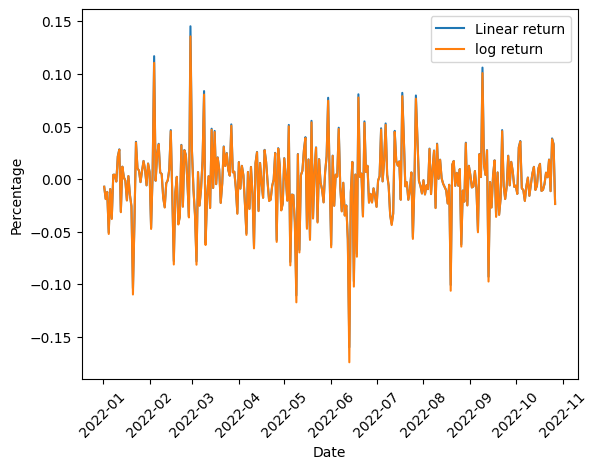

In [7]:
l5, = plt.plot(linear_return,label="Linear return")
l6, = plt.plot(log_return,label="log return")
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(handles=[l5,l6],loc='best')
plt.show()

## Time Series Analysis

8. Define the autocorrelation function(for a stationary time-series)

For a stationay time series $\{X_t\}$, the autocorrelation function is defined as:
$\forall k,i\in \mathbb{N}$ $$ \rho (k) = \frac{\gamma(k)}{\gamma(0)} = \frac{Cov(X_i,X_{i+k})}{\sigma^2}$$
where $\gamma(k)$ is the autocovariance function which is equal to $\mathbb{Cov}(X_i,X_{i+k})$ $\forall i$

9. Compute the auto-correlation function(ACF) of the price time series

For a time window $k$ we take two parts of the time seires, $[0,l-k]$ and $[k,l]$ and find their correlation, we will see sample autocorrelation be the form:
$$\sum_{i=0}^{l-k} \frac{(X_i-\mu)(X_{i+k}-\mu)}{\sigma^2}$$
where $\mu$ is the sample price time series mean, and $\sigma^2$ is the sample variance.

In [8]:
#The auto correlation function  
def get_auto_corr(timeSeries,k):
    """ 
    Series1 and series2: two time series with lag k
    timeSeries_mean: The sample mean of the time series
    timeSeries_var: c(0) i.e. variance of X_i for all i
    """
    l = len(timeSeries)
    Series1 = timeSeries[0:l-k]
    Series2 = timeSeries[k:]
    timeSeries_mean = timeSeries.mean()
    timeSeries_var = np.array([i**2 for i in timeSeries-timeSeries_mean]).sum()
    auto_corr = 0
    for i in range(l-k):
        temp = (Series1[i]-timeSeries_mean)*(Series2[i]-timeSeries_mean)/timeSeries_var
        auto_corr += temp  
    return auto_corr

ACF = pd.Series(dtype='float64')
for i in range(0,301):
    ACF.loc[i] = get_auto_corr(btc_adj_price,i)
print(ACF)

0      1.000000
1      0.986840
2      0.973941
3      0.961096
4      0.947506
         ...   
296   -0.023760
297   -0.017684
298   -0.011865
299   -0.006139
300    0.000000
Length: 301, dtype: float64


10. Plot the price ACF

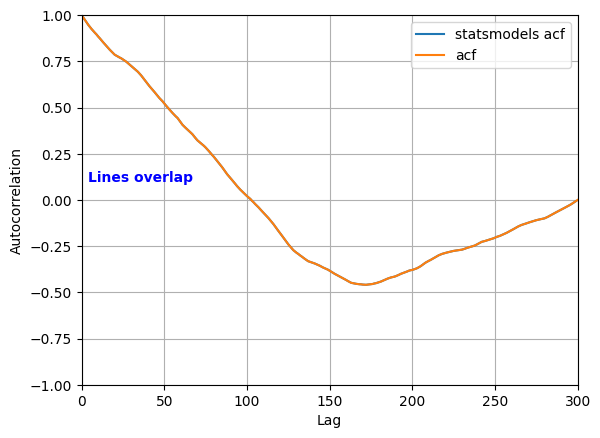

In [9]:
#validate using statsmodels acf
verified_acf = acf(btc_adj_price,nlags=300)

# plot the graph
l7, = plt.plot(verified_acf,label='statsmodels acf')
l8, = plt.plot(ACF,label='acf')
plt.ylim([-1,1])
plt.xlim([0,300])
plt.ylabel("Autocorrelation")
plt.xlabel("Lag")
plt.legend(handles=[l7,l8],loc='best')
plt.grid()
plt.text(4.10,0.1,"Lines overlap",weight="bold",color="b")
plt.show()

11. Compute the partial auto-correlation function(PACF) of the price time series

In [10]:
def yule_walker(x, nlags=149):
    x = np.array(x, dtype=np.float64)
    x -= x.mean()
    n = x.shape[0]
 
    r = np.zeros(shape=nlags+1, dtype=np.float64)
    r[0] = (x ** 2).sum()/n
 
    for k in range(1, nlags+1):
        r[k] = (x[0:-k] * x[k:]).sum() / (n-k*1)
 
    from scipy.linalg import toeplitz
    R = toeplitz(c=r[:-1])
    result = np.linalg.solve(R, r[1:])
    return result
 
def cal_my_pacf_yw(x, nlags=149):
    pacf = np.empty(nlags+1) * 0
    pacf[0] = 1.0
    for k in range(1, nlags+1):
        pacf[k] = yule_walker(x,nlags=k)[-1]
 
    return pacf
 
pacf_my = cal_my_pacf_yw(btc_adj_price)

12. Plot the price PACF

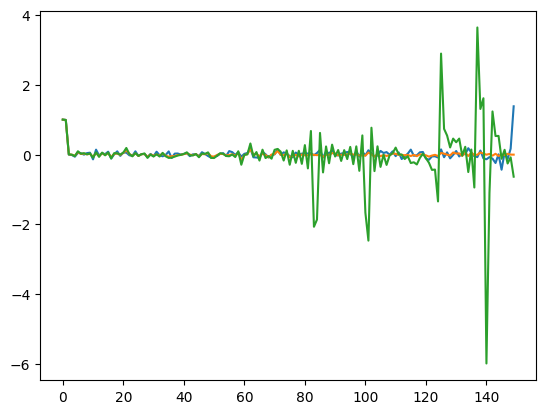

In [11]:
plt.plot(pacf(btc_adj_price,method='ols',nlags=149))
plt.plot(pacf(btc_adj_price,method='ywm',nlags=149))
plt.plot(pacf(btc_adj_price,method='yw',nlags=149))
#plt.plot(pacf_my)

13. Compute the auto-correlation function(ACF) of the return time series

In [12]:
return_ACF = pd.Series(dtype='float64')
for i in range(0,301):
    return_ACF.loc[i] = get_auto_corr(linear_return,i)
print(return_ACF)

0      1.000000
1     -0.012719
2      0.040302
3      0.025180
4     -0.048302
         ...   
296   -0.001708
297    0.000501
298    0.000301
299    0.000000
300    0.000000
Length: 301, dtype: float64


14. Plot the return ACF  

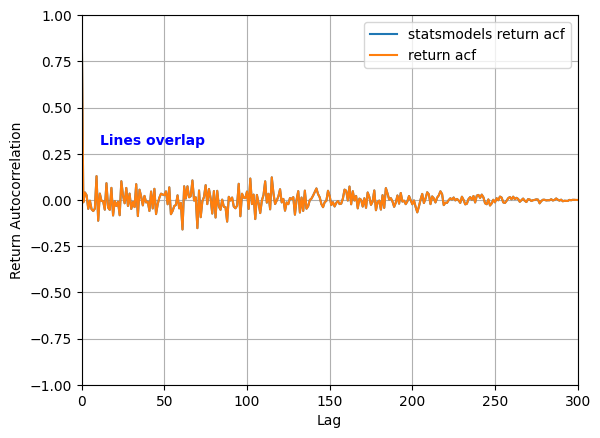

In [13]:
#validate using statsmodels acf
verified_return_acf = acf(linear_return,nlags=300)

# plot the graph
l11, = plt.plot(verified_return_acf,label='statsmodels return acf')
l12, = plt.plot(return_ACF,label='return acf')
plt.ylim([-1,1])
plt.xlim([0,300])
plt.ylabel("Return Autocorrelation")
plt.xlabel("Lag")
plt.grid()
plt.legend(handles=[l11,l12],loc='best')
plt.text(11.10,0.3,"Lines overlap",weight="bold",color="b")
plt.show()

15. Compute the partial auto-correlation function(PACF) of the return time series

In [14]:
pacf_return = cal_my_pacf_yw(linear_return)

16. Plot the return PACF

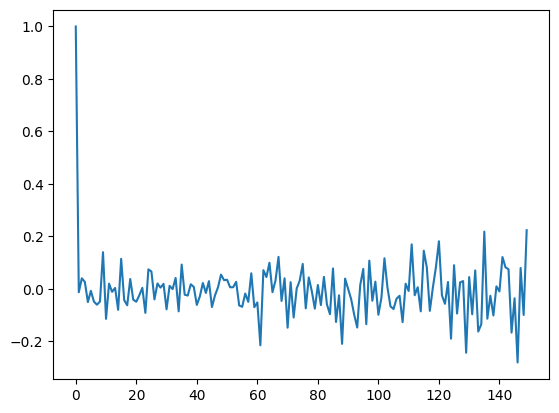

In [15]:
plt.plot(pacf_return)
plt.show()

## ARMA Models

17. Define mathematically an $ARMA(p,q)$ model

For a stationary time series $\{X_t\}$, an $ARMA(p,q)$ model is defined as
$$\phi(\boldsymbol B)X_t = \theta(\boldsymbol B)\epsilon_t$$
Where $\boldsymbol B$ is the lag operator, $\phi(z) = 1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p$ and $\theta(z) = 1 + \theta_1z +\theta_2z^2 + ... + \theta_qz^q$ 

18. Define a training and test set and fit an $ARMA$ model to the price time series

we are going to take the first 240 days as training set and the rest as test set.

In [16]:
training_set = btc_adj_price.iloc[0:240]
test_set = btc_adj_price.iloc[240:300]

For the ARMA model, \
First we have to check whether the price time series is stationary or not. So we run the ADF test.

In [17]:
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
ADF_test = ADF(training_set)
print(ADF_test)
print('P value is way too large, so consider taking the first order difference method')

(-1.078868576836166, 0.7234248920595528, 0, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 3814.056676558694)
P value is way too large, so consider taking the first order difference method


In [18]:
training_set_diff1 = training_set.diff(1).dropna()
test_set_diff1 = test_set.diff(1).dropna()
ADF_test1 = ADF(training_set_diff1)
print(ADF_test1)

(-15.279227623978658, 4.602377076524975e-28, 0, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, 3798.335376303103)


Lets see the ACF and PACF of the first order difference time series

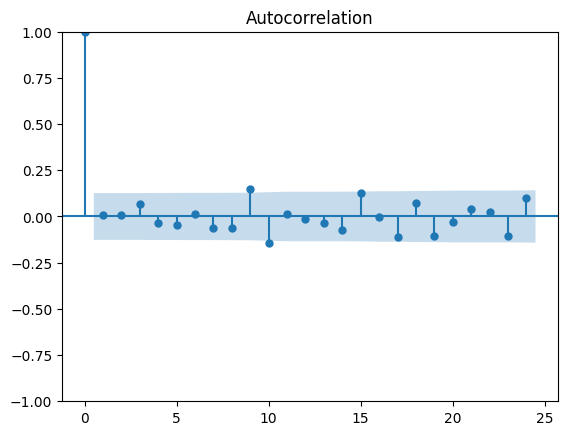

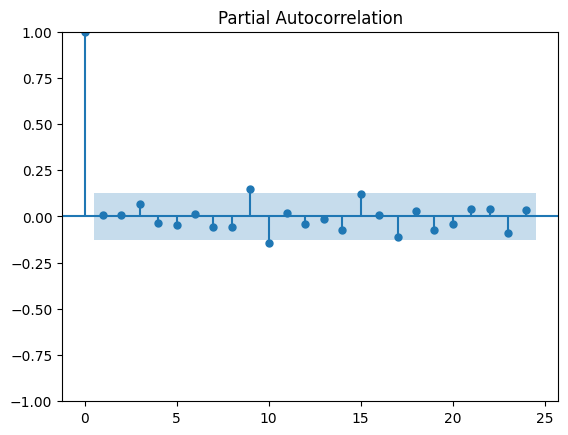

In [19]:
plot_acf(training_set_diff1)
plot_pacf(training_set_diff1,method='ywm')
plt.show()

The ACF and PACF look stationary now. Then we can build the ARMA model finding the order of $p$ and $q$

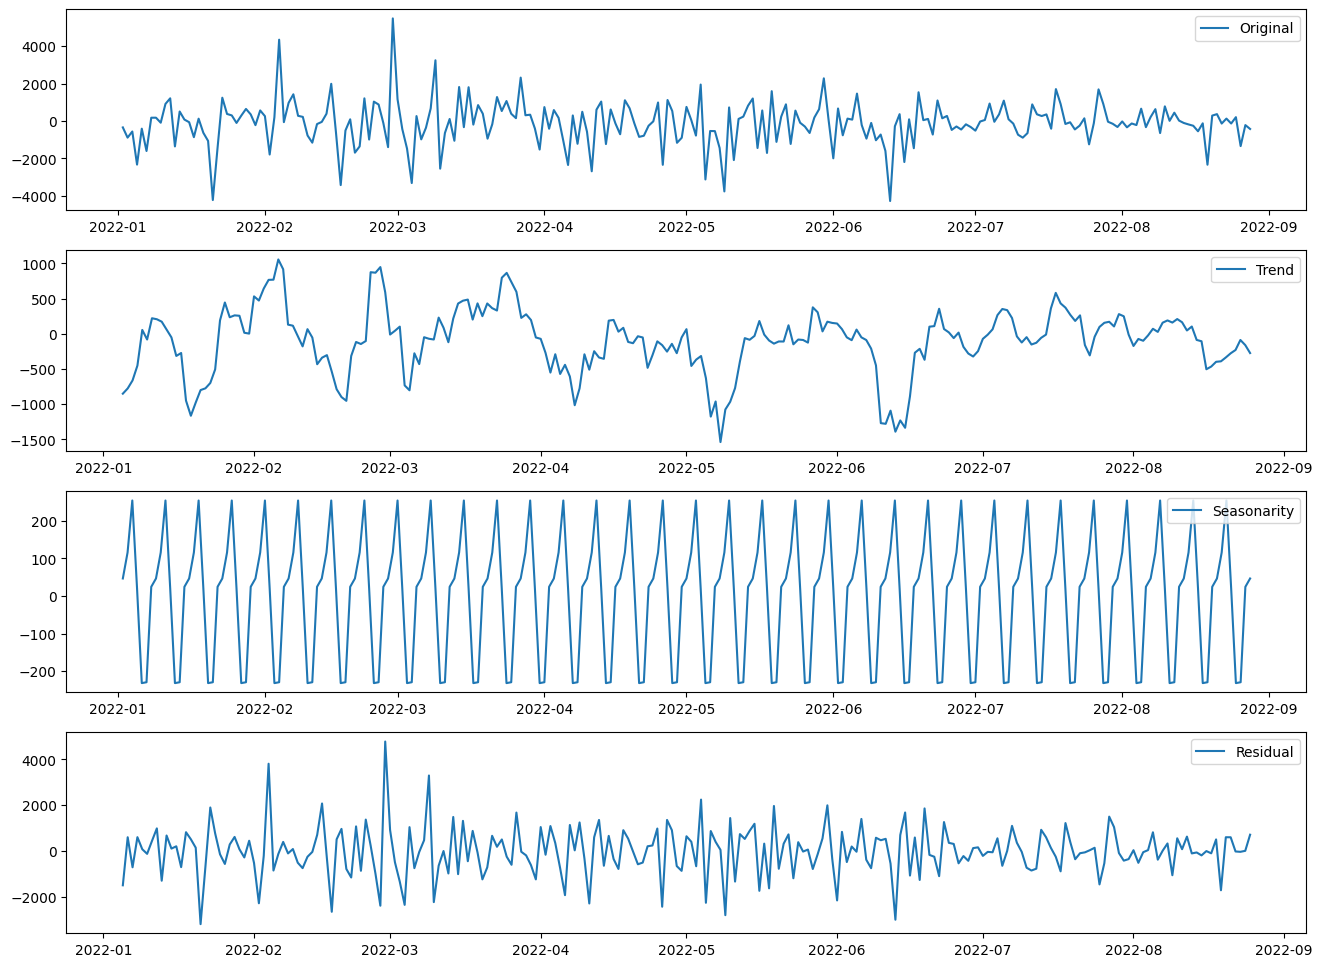

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

decomposing(training_set_diff1)

In [21]:
import statsmodels.api as sm
decomposition = seasonal_decompose(training_set_diff1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='c', max_ar=10,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='n', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)

c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\479

trend AIC (8, 4)
trend BIC (6, 4)


c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizatio

residual AIC (2, 2)
residual BIC (2, 2)


c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\47965\miniconda3\envs\venvFinancialML\lib\site-packages\statsmo

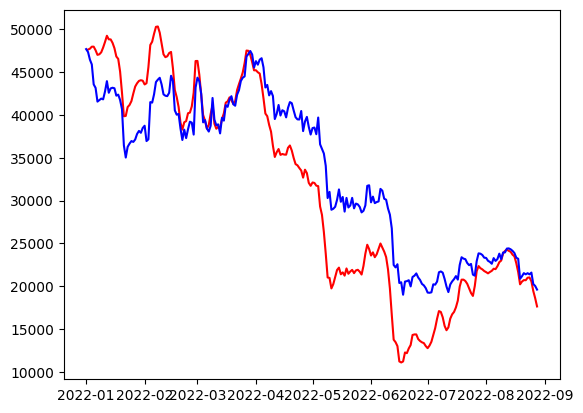

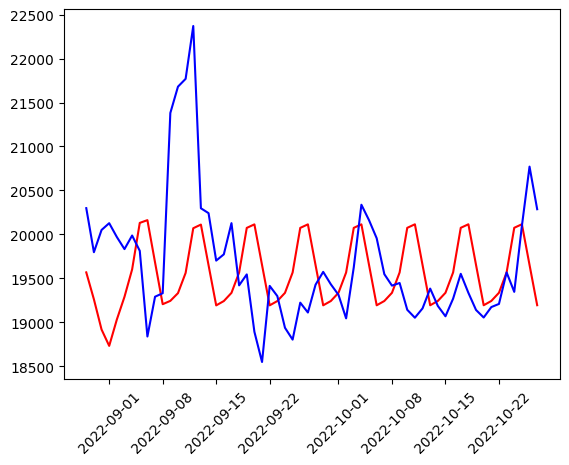

In [27]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit()

decomposition = seasonal_decompose(training_set_diff1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_model = ARIMA_Model(trend, (6, 0, 4))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2022-08-29',end='2022-10-27',dynamic=True)

residual_model = ARIMA_Model(residual, (2, 0, 2))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2022-08-29',end='2022-10-27',dynamic=True)

fit_seq = pd.Series(dtype='float64')
fit_seq = fit_seq.add(seasonal,fill_value=0)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

#converte the fitted sequence back to the original value
xs = fit_seq.cumsum() + training_set[0]
plt.plot(xs, color='red', label='fit_seq')
plt.plot(training_set, color='blue')
plt.show()

weel = trend_predict_seq
for i in range(len(weel)):
    weel.iloc[i] = seasonal.iloc[2+i] 
predict_seq = pd.Series(dtype='float64')
predict_seq = predict_seq.add(weel,fill_value=0)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)

xl = predict_seq.cumsum() + test_set[0]
plt.plot(xl, color='red', label='fit_seq')
plt.plot(test_set, color='blue')
plt.xticks(rotation=45)
plt.show()


19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [45]:
trend_model.params

const      -101.420676
ar.L1         1.425947
ar.L2        -1.482309
ar.L3         1.465539
ar.L4        -1.298904
ar.L5         0.956793
ar.L6        -0.485756
ma.L1        -0.556675
ma.L2         1.210349
ma.L3        -0.562776
ma.L4         0.889995
sigma2    42423.402228
dtype: float64

In [46]:
residual_model.params

const          0.040493
ar.L1          1.099400
ar.L2         -0.404697
ma.L1         -1.999679
ma.L2          0.999679
sigma2    556847.488507
dtype: float64

## Gaussianity and stationarity test

24. Introduce mathematically a Gaussianity test

A statistical test for Gaussianity test is Shapiro-Wilk test, it test the null hypothesis that a sample $x_1, ..., X_n$ came from a normal distribution.\
The test statistic is:
$$\mathbf{W} = \frac{(\sum_{i=1}^{n}a_ix_{(i)})^2}{\sum_{i=1}^{n}(x_i-\hat{x})^2}$$
where $x_i$ is the $ith$ order statistic, and $\hat{x}$ is the sample mean. 

25. Perform a Gaussianity test of the return time series

26. Introduce mathematically a stationarity test

27. Perform a stationarity test of the return time series